In [4]:
from pathlib import Path
import csv
from time import time
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import MetaTrader5 as mt
import scipy as sp

import vectorbt as vbt

import pyfolio as pf

import MetaTrader5 as mt

import warnings
warnings.filterwarnings('ignore')

mt.initialize()

login_mt5 = 1051534030
mdp_mt5 = 'FG2SF2M74R'
server = 'FTMO-Demo'

mt.login(login_mt5, mdp_mt5, server)

True

In [5]:
with pd.HDFStore('data.h5') as hdf:
    data = hdf['data_rsi_filtre']
    prices = hdf['prices_rsi_filtre']
    relative_spread_cost = hdf['rsi_relative_spread_cost']
    pred = hdf['pred']

In [6]:
pred = pred.predicted.unstack(0).reindex(prices.unstack(0).dropna(how='any').index).dropna(how='any')
index = pred.index
high_prices = prices['high'].unstack(0).dropna(how='any').reindex(index)
low_prices = prices['low'].unstack(0).dropna(how='any').reindex(index)
close_prices = prices['close'].unstack(0).dropna(how='any').reindex(index)
spread = prices['spread'].unstack(0).dropna(how='any').reindex(index)

In [7]:
rank_pred = pred.abs().rank(axis=1, ascending=False)

In [8]:
rank_thr = 3
long_entries = ((pred > 0) & (rank_pred < rank_thr) & ((close_prices - spread) > low_prices.shift(-1)))
short_entries = ((pred < 0) & (rank_pred < rank_thr) & ((close_prices + spread) < high_prices.shift(-1)))
long_exits = (pred < 0)
short_exits = (pred > 0)

In [ ]:
for index in long:
    close_prices

In [28]:
portfolio = vbt.Portfolio.from_signals(
    close_prices, 
    entries=long_entries, 
    exits=long_exits, 
    short_entries=short_entries, 
    short_exits=short_exits)

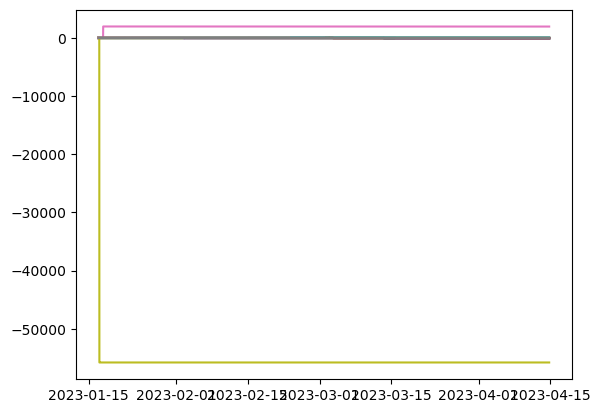

In [29]:
plt.plot(returns.cumsum())

In [22]:
returns = portfolio.returns()
pf.create_simple_tear_sheet(returns)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [3]:
vbt.Portfolio.from_signals?